In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/

Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
if not os.path.exists("vggt"):
  !git clone https://github.com/facebookresearch/vggt.git

Cloning into 'vggt'...
remote: Enumerating objects: 550, done.
remote: Counting objects: 100% (243/243), done.
remote: Compressing objects: 100% (129/129), done.
remote: Total 550 (delta 168), reused 121 (delta 114), pack-reused 307 (from 1)
Receiving objects: 100% (550/550), 64.57 MiB | 21.83 MiB/s, done.
Resolving deltas: 100% (227/227), done.
Updating files: 100% (129/129), done.


In [ ]:
%cd vggt

/content/drive/MyDrive/vggt


# Dependencies

In [ ]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

# Training

In [ ]:
image_folder = "examples/kitchen/images"
image_names = glob.glob(os.path.join(image_folder,"*.png"))
image_names

['examples/kitchen/images/00.png',
 'examples/kitchen/images/01.png',
 'examples/kitchen/images/02.png',
 'examples/kitchen/images/03.png',
 'examples/kitchen/images/04.png',
 'examples/kitchen/images/05.png',
 'examples/kitchen/images/06.png',
 'examples/kitchen/images/07.png',
 'examples/kitchen/images/08.png',
 'examples/kitchen/images/09.png',
 'examples/kitchen/images/10.png',
 'examples/kitchen/images/11.png',
 'examples/kitchen/images/12.png',
 'examples/kitchen/images/13.png',
 'examples/kitchen/images/14.png',
 'examples/kitchen/images/15.png',
 'examples/kitchen/images/16.png',
 'examples/kitchen/images/17.png',
 'examples/kitchen/images/18.png',
 'examples/kitchen/images/19.png',
 'examples/kitchen/images/20.png',
 'examples/kitchen/images/21.png',
 'examples/kitchen/images/22.png',
 'examples/kitchen/images/23.png',
 'examples/kitchen/images/24.png']

In [ ]:
os.getcwd()

'/content/drive/MyDrive/vggt'

In [ ]:
import torch
from vggt.models.vggt import VGGT
from vggt.utils.load_fn import load_and_preprocess_images

device = "cuda" if torch.cuda.is_available() else "cpu"
# bfloat16 is supported on Ampere GPUs (Compute Capability 8.0+)
dtype = torch.bfloat16 if torch.cuda.get_device_capability()[0] >= 8 else torch.float16

# Initialize the model and load the pretrained weights.
# This will automatically download the model weights the first time it's run, which may take a while.
model = VGGT.from_pretrained("facebook/VGGT-1B").to(device)

# Load and preprocess example images (replace with your own image paths)
image_names = image_names[:3]
images = load_and_preprocess_images(image_names).to(device)

with torch.no_grad():
    with torch.cuda.amp.autocast(dtype=dtype):
        # Predict attributes including cameras, depth maps, and point maps.
        predictions = model(images)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/5.03G [00:00<?, ?B/s]

<ipython-input-8-7b63b9db4478>:18: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(dtype=dtype):
/content/drive/MyDrive/vggt/vggt/models/vggt.py:67: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


In [ ]:
predictions['depth'].shape

torch.Size([1, 3, 350, 518, 1])

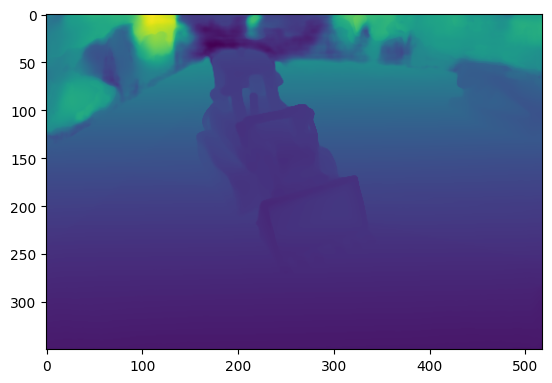

In [ ]:
plt.imshow(predictions['depth'][0,2].cpu())

(array([30234., 71938., 34161., 18427., 12010.,  9975.,  2719.,   734.,
          627.,   475.]),
 array([0.56962889, 0.84179598, 1.11396313, 1.38613009, 1.6582973 ,
        1.93046427, 2.20263147, 2.47479844, 2.74696565, 3.01913285,
        3.29129982]),
 <BarContainer object of 10 artists>)

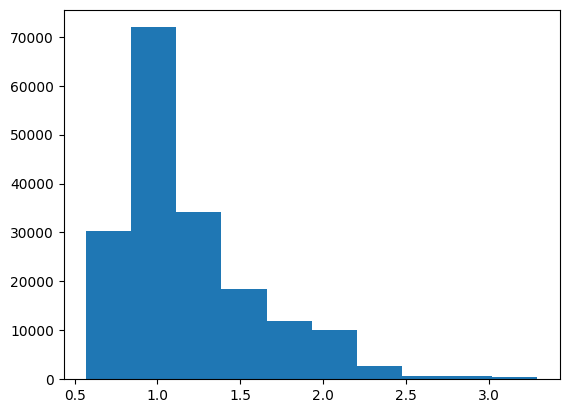

In [ ]:
plt.hist(predictions['depth'][0,2].cpu().flatten())